# Product Recommendation Project

In [1]:
import numpy as np
import pandas as pd


In [4]:
# ss_data = pd.read_csv("Superstore-Data.csv",encoding='utf-16')
# ss_data = ss_data.drop(columns = ['Unnamed: 0'])
# ss_data

import numpy as np
import pandas as pd

# Try reading the file with a different encoding, like 'utf-8' or 'latin-1'.
# If you know the actual encoding, replace 'utf-8' with the correct one.
try:
  ss_data = pd.read_csv("Superstore-Data.csv", encoding='utf-8')
except UnicodeDecodeError:
  ss_data = pd.read_csv("Superstore-Data.csv", encoding='latin-1')

# Check if 'Unnamed: 0' is in the columns before trying to drop it
if 'Unnamed: 0' in ss_data.columns:
  ss_data = ss_data.drop(columns=['Unnamed: 0'])

# Alternatively, if you want to drop the first column regardless of its name:
# ss_data = ss_data.drop(columns=ss_data.columns[0])

ss_data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [5]:
ss_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
ss_data.shape

(9994, 21)

In [7]:
ss_data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
ss_data.Segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [9]:
ss_data.Region.unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [10]:
ss_data.State.nunique()

49

In [11]:
ss_data["Customer Name"].nunique()

793

In [12]:
ss_data["Product Name"].nunique()

1850

In [16]:
# Groupby and get sum() and count()

product_sum_and_count = ss_data.groupby('Product Name', sort=False)[['Sales', "Profit"]].agg(['sum','count'])
sorted_prd_details = product_sum_and_count.sort_values('Product Name', ascending=False)
product_sum_and_count

Sales        \
                                                          sum count   
Product Name                                                          
Bush Somerset Collection Bookcase                    1263.957     4   
Hon Deluxe Fabric Upholstered Stacking Chairs, ...  10637.528    12   
Self-Adhesive Address Labels for Typewriters by...    153.510     7   
Bretford CR4500 Series Slim Rectangular Table        7242.768     8   
Eldon Fold 'N Roll Cart System                        301.968     5   
...                                                       ...   ...   
RCA ViSYS 25425RE1 Corded phone                       323.976     1   
Cisco 8961 IP Phone Charcoal                          224.937     1   
Eureka Hand Vacuum, Bagless                           197.720     1   
LG G2                                                1499.970     1   
Eldon Jumbo ProFile Portable File Boxes Graphit...     36.744     1   

                                                       Profit        
                                                          sum count  
Product Name                                                         
Bush Somerset Collection Bookcase                    -56.3214     4  
Hon Deluxe Fabric Upholstered Stacking Chairs, ...  1927.4420    12  
Self-Adhesive Address Labels for Typewriters by...    64.4011     7  
Bretford CR4500 Series Slim Rectangular Table       -532.7613     8  
Eldon Fold 'N Roll Cart System                        63.7488     5  
...                                                       ...   ...  
RCA ViSYS 25425RE1 Corded phone                       36.4473     1  
Cisco 8961 IP Phone Charcoal                        -164.9538     1  
Eureka Hand Vacuum, Bagless                           55.3616     1  
LG G2                                               -374.9925     1  
Eldon Jumbo ProFile Portable File Boxes Graphit...     3.6744     1  

[1850 rows x 4 columns]

In [17]:
# To save above dataset

product_sum_and_count.to_excel("Product-Details.xlsx")

### Exploratory Data Analysis

In [19]:
!pip install squarify

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

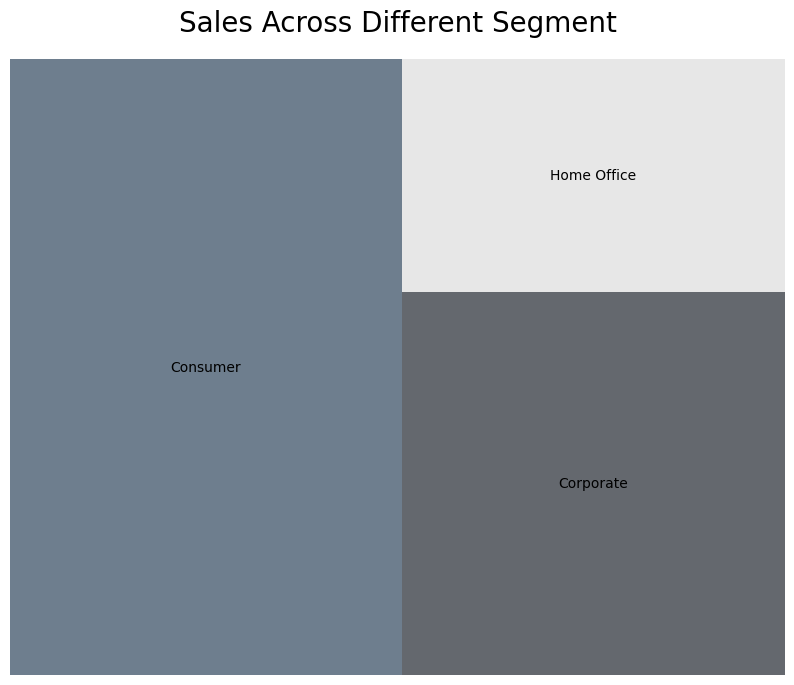

In [21]:
# Understanding which segment has the highest and lowest sales

df_tree = ss_data[['Segment','Sales']]
# taking a groupby on category and then ship mode
df_tree = df_tree.groupby(['Segment']).sum().reset_index()

# Visualizing the Sales TreeMap
plt.figure(figsize=[10,8])

squarify.plot(sizes=df_tree['Sales'], label=df_tree['Segment'],
              color=['#30475E','#222831','#DDDDDD'], alpha=0.7)
plt.title("Sales Across Different Segment", size=20, pad=20)
plt.axis('off')

plt.show()

**Conclusion**: Definetly Consumers and Home Office are most and least valuable customer segment for our business respectively.

<BarContainer object of 4 artists>

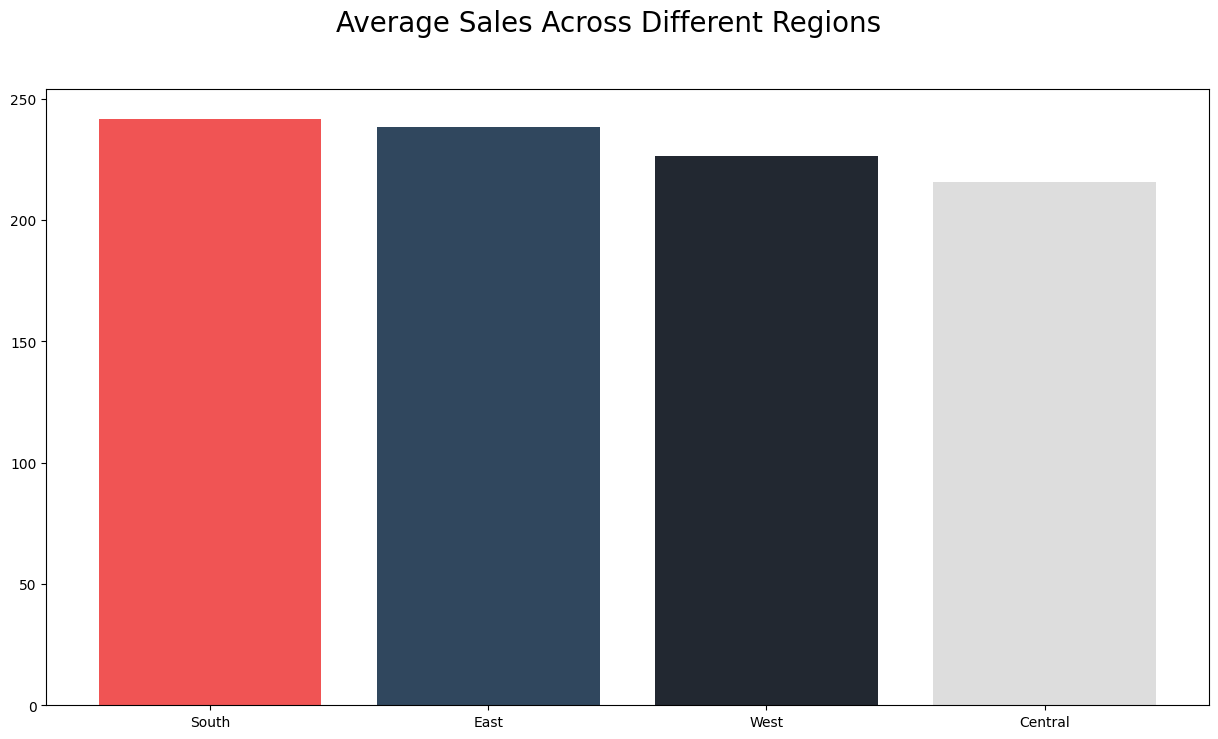

In [22]:
# To understand the Average Sales across different Regions.

# First of all, we are going to take only the subset of data for our purpose.
df_bar = ss_data[['Region','Sales']]

# Grouping the DataFrame based on Regions and taking mean of profit across each of them.
# The reason for sorting is to show the larger values at the beginning
df_bar = df_bar.groupby('Region').mean().sort_values(by='Sales', ascending=False)

plt.figure(figsize=[15,8]) # Setting the figure size

# Visualizing using Bar Chart
plt.suptitle("Average Sales Across Different Regions", size=20)

# Plotting the BarChart
plt.bar(x=df_bar.index, height='Sales', color=['#F05454','#30475E','#222831','#DDDDDD'], data=df_bar)

**Conclusion**: Clearly, South Region has the highest average sales approximately 250 dollars.

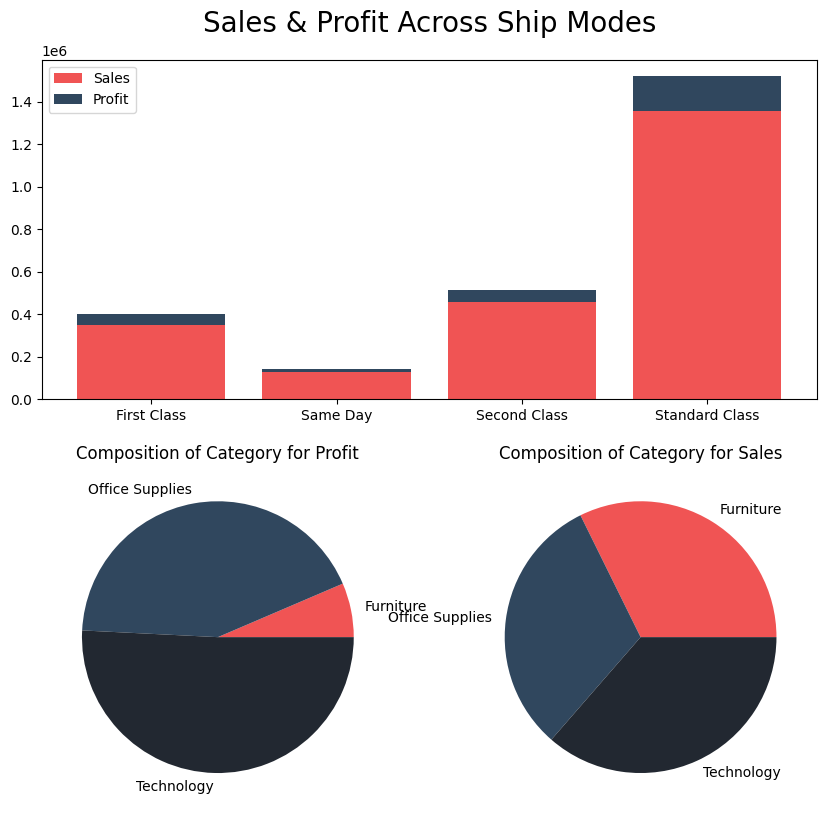

In [23]:
# To understand how the Sales impact Profit for different Customer Segments.

df_stackb = ss_data[['Ship Mode','Sales','Profit']]
# taking a groupby on category and then ship mode...
df_stackb = df_stackb.groupby(['Ship Mode']).sum().reset_index()

# Visualizing the Stacked BarChart
plt.figure(figsize=[10,15])
plt.subplot(3,1,1)
plt.bar(x=df_stackb['Ship Mode'], height=df_stackb['Sales'], color='#F05454')
plt.bar(x=df_stackb['Ship Mode'], height=df_stackb['Profit'], bottom=df_stackb['Sales'], color='#30475E')
plt.title("Sales & Profit Across Ship Modes", size=20, pad=20)
plt.legend(['Sales','Profit'])

###################################################################
# Taking a subset of data (To keep things simple)
df_pie = ss_data[['Category','Sales','Profit']]
# taking a groupby on category and then ship mode...
df_pie = df_pie.groupby(['Category']).sum().reset_index()

# Visualizing the Pie Chart (Profit)
plt.subplot(3,2,3)
plt.pie(df_pie['Profit'], labels=df_pie['Category'], colors=['#F05454','#30475E','#222831','#DDDDDD'])
plt.title("Composition of Category for Profit")

# Visualizing the Pie Chart (Sales)
plt.subplot(3,2,4)
plt.pie(df_pie['Sales'], labels=df_pie['Category'], colors=['#F05454','#30475E','#222831','#DDDDDD'])
plt.title("Composition of Category for Sales")

plt.show()

**Conclusion**:  Technology has highest contribution in Profit. And we get maximum sales from Standard Class and so Profit.

### Model Building - Reviews Dataframe

In [24]:
reviews = pd.read_csv("Superstore-Dataset-Reviews.csv")
reviews

,Row ID,Order ID,Customer ID,Product ID,Segment,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Rate,Review,Summary
0,1,CA-2016-152156,CG-12520,FUR-BO-10001798,Consumer,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,5,Super!,Great cooler.. excellent air flow and for this...
1,2,CA-2016-152156,CG-12520,FUR-CH-10000454,Consumer,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,5,Awesome,Best budget 2 fit cooler. Nice cooling
2,3,CA-2016-138688,DV-13045,OFF-LA-10000240,Corporate,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,3,Fair,The quality is good but the power of air is de...
3,4,US-2015-108966,SO-20335,FUR-TA-10000577,Consumer,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,1,Useless product,Very bad product it's a only a fan
4,5,US-2015-108966,SO-20335,OFF-ST-10000760,Consumer,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,3,Fair,Ok ok product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,TB-21400,FUR-FU-10001889,Consumer,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,1,Terrible product,According to price product is not better.
9990,9991,CA-2017-121258,DB-13060,FUR-FU-10000747,Consumer,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,4,Good quality product,Good
9991,9992,CA-2017-121258,DB-13060,TEC-PH-10003645,Consumer,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,4,Really Nice,Very nice
9992,9993,CA-2017-121258,DB-13060,OFF-PA-10004041,Consumer,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,5,Mind-blowing purchase,Good


In [ ]:
reviews.shape

In [26]:
reviews.columns

Index(['Row ID', 'Order ID', 'Customer ID', 'Product ID', 'Segment',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Rate', 'Review', 'Summary'],
      dtype='object')

In [27]:
reviews["Retail Price"] = reviews["Sales"]/reviews["Quantity"]

In [28]:
reviews

,Row ID,Order ID,Customer ID,Product ID,Segment,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Rate,Review,Summary,Retail Price
0,1,CA-2016-152156,CG-12520,FUR-BO-10001798,Consumer,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,5,Super!,Great cooler.. excellent air flow and for this...,130.9800
1,2,CA-2016-152156,CG-12520,FUR-CH-10000454,Consumer,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,5,Awesome,Best budget 2 fit cooler. Nice cooling,243.9800
2,3,CA-2016-138688,DV-13045,OFF-LA-10000240,Corporate,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,3,Fair,The quality is good but the power of air is de...,7.3100
3,4,US-2015-108966,SO-20335,FUR-TA-10000577,Consumer,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,1,Useless product,Very bad product it's a only a fan,191.5155
4,5,US-2015-108966,SO-20335,OFF-ST-10000760,Consumer,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,3,Fair,Ok ok product,11.1840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,TB-21400,FUR-FU-10001889,Consumer,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,1,Terrible product,According to price product is not better.,8.4160
9990,9991,CA-2017-121258,DB-13060,FUR-FU-10000747,Consumer,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,4,Good quality product,Good,45.9800
9991,9992,CA-2017-121258,DB-13060,TEC-PH-10003645,Consumer,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,4,Really Nice,Very nice,129.2880
9992,9993,CA-2017-121258,DB-13060,OFF-PA-10004041,Consumer,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,5,Mind-blowing purchase,Good,7.4000


### Popularity Based Recommendation System

In [29]:
# Average retail price of the Product name

prod_retail_price = reviews.groupby('Product Name')['Retail Price'].mean().sort_values(ascending=False).head()
prod_retail_price

,Retail Price
Product Name,
Cisco TelePresence System EX90 Videoconferencing Unit,3773.080000
Canon imageCLASS 2200 Advanced Copier,3079.991200
Cubify CubeX 3D Printer Triple Head Print,1999.995000
Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier,1995.990000
High Speed Automatic Electric Letter Opener,1528.361333


In [30]:
# Finding number of rating on a particular product

prod_rating_df = reviews.groupby('Product Name')['Rate'].count().reset_index()
prod_rating_df

,Product Name,Rate
0,"""While you Were Out"" Message Book, One Form pe...",3
1,"#10 Gummed Flap White Envelopes, 100/Box",4
2,#10 Self-Seal White Envelopes,4
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",7
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",10
...,...,...
1845,iKross Bluetooth Portable Keyboard + Cell Phon...,5
1846,iOttie HLCRIO102 Car Mount,5
1847,iOttie XL Car Mount,2
1848,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,7


In [31]:
prod_rating_df["Rate"].unique()

array([ 3,  4,  7, 10,  8,  2,  6,  5,  1, 13,  9, 11, 12, 20, 46, 14, 18,
       15, 48, 16, 19, 17])

In [32]:
# Rate value count

prod_rating_df["Rate"].value_counts()

,count
Rate,
4,290
5,284
6,256
3,211
7,188
2,169
8,154
1,91
9,81


In [33]:
# Finding average rating on a particular product

prod_avgrating_df = reviews.groupby('Product Name')['Rate'].mean().reset_index()
prod_avgrating_df

,Product Name,Rate
0,"""While you Were Out"" Message Book, One Form pe...",4.000000
1,"#10 Gummed Flap White Envelopes, 100/Box",5.000000
2,#10 Self-Seal White Envelopes,4.750000
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",4.142857
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",4.400000
...,...,...
1845,iKross Bluetooth Portable Keyboard + Cell Phon...,2.800000
1846,iOttie HLCRIO102 Car Mount,3.600000
1847,iOttie XL Car Mount,5.000000
1848,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,3.714286


In [34]:
# Popluar product df based on total no. of rating and average rating

popluar_product_df = prod_rating_df.merge(prod_avgrating_df, on = "Product Name")
popluar_product_df = popluar_product_df.rename(columns = {"Rate_x" : "Num_Rating", "Rate_y":"Avg_Rating"})
popluar_product_df

,Product Name,Num_Rating,Avg_Rating
0,"""While you Were Out"" Message Book, One Form pe...",3,4.000000
1,"#10 Gummed Flap White Envelopes, 100/Box",4,5.000000
2,#10 Self-Seal White Envelopes,4,4.750000
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",7,4.142857
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",10,4.400000
...,...,...,...
1845,iKross Bluetooth Portable Keyboard + Cell Phon...,5,2.800000
1846,iOttie HLCRIO102 Car Mount,5,3.600000
1847,iOttie XL Car Mount,2,5.000000
1848,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,7,3.714286


In [35]:
# Avg Rate value count

popluar_product_df["Avg_Rating"].value_counts()

,count
Avg_Rating,
4.000000,241
5.000000,174
4.500000,116
3.000000,92
4.666667,65
...,...
3.615385,1
3.181818,1
3.100000,1


In [36]:
# Final popluar product dataframe with produict copunt of > = 10

popluar_prod = popluar_product_df[popluar_product_df["Num_Rating"] >= 10].sort_values("Avg_Rating", ascending = False).reset_index()
popluar_prod = popluar_prod.drop(columns=["index"])
popluar_prod

,Product Name,Num_Rating,Avg_Rating
0,Fellowes Bases and Tops For Staxonsteel/High-S...,10,4.800000
1,Global Leather Highback Executive Chair with P...,11,4.727273
2,Bretford Rectangular Conference Table Tops,12,4.666667
3,Acco Flexible ACCOHIDE Square Ring Data Binder...,10,4.600000
4,Wilson Jones Leather-Like Binders with DublLoc...,12,4.583333
...,...,...,...
121,"Acco Pressboard Covers with Storage Hooks, 14 ...",11,3.181818
122,Adams Telephone Message Book W/Dividers/Space ...,10,3.100000
123,AT&T 17929 Lendline Telephone,10,3.000000
124,Satellite Sectional Post Binders,11,2.636364


In [37]:
# Creating final df of Popular Products

pop_final_data = popluar_prod.merge(reviews, on = "Product Name")
pop_final_data = pop_final_data.drop(columns=['Row ID', 'Order ID', 'Customer ID', 'Quantity'])
pop_final_data = pop_final_data.drop_duplicates("Product ID")
pop_final_data = pop_final_data.reset_index()
pop_final_data = pop_final_data.drop(columns=['index'])
pop_final_data

,Product Name,Num_Rating,Avg_Rating,Product ID,Segment,Category,Sub-Category,Sales,Discount,Profit,Rate,Review,Summary,Retail Price
0,Fellowes Bases and Tops For Staxonsteel/High-S...,10,4.800000,OFF-ST-10003123,Consumer,Office Supplies,Storage,199.7400,0.00,47.9376,5,Simply awesome,Nice product buy it without any doubt,33.2900
1,Global Leather Highback Executive Chair with P...,11,4.727273,FUR-CH-10002965,Consumer,Furniture,Chairs,321.5680,0.20,28.1372,5,Super!,Good cooler,160.7840
2,Bretford Rectangular Conference Table Tops,12,4.666667,FUR-TA-10003473,Home Office,Furniture,Tables,620.6145,0.45,-248.2458,5,Wonderful,awaesome cooler.... it is better than symphony,206.8715
3,Acco Flexible ACCOHIDE Square Ring Data Binder...,10,4.600000,OFF-BI-10000962,Consumer,Office Supplies,Binders,117.1440,0.20,42.4647,5,Just wow!,Very nice,13.0160
4,Wilson Jones Leather-Like Binders with DublLoc...,12,4.583333,OFF-BI-10003291,Corporate,Office Supplies,Binders,17.4600,0.00,8.2062,3,Very satisfactory,The Good things1. Very well packed. Good amoun...,8.7300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,"Acco Pressboard Covers with Storage Hooks, 14 ...",11,3.181818,OFF-BI-10003712,Home Office,Office Supplies,Binders,5.8920,0.70,-4.1244,5,Worth every penny,I have purchased this cooler from flipkart. It...,1.4730
164,Adams Telephone Message Book W/Dividers/Space ...,10,3.100000,OFF-PA-10001838,Corporate,Office Supplies,Paper,5.8800,0.00,2.8812,3,Does the job,"Value for money, useful in kerala summer,If u ...",5.8800
165,AT&T 17929 Lendline Telephone,10,3.000000,TEC-PH-10002890,Consumer,Technology,Phones,108.5760,0.20,8.1432,1,Unsatisfactory,Very very bad quality,36.1920
166,Satellite Sectional Post Binders,11,2.636364,OFF-BI-10000632,Corporate,Office Supplies,Binders,69.4560,0.20,22.5732,3,Decent product,Very nice product.. I am very happy,34.7280


Now, let's also build a model for CFB Recommendation System.

### Collaborative Filtering Based Recommendation System

In [38]:
# Filtering based on user users who has given 20 or more ratings

user_df = reviews.groupby("Customer ID").filter(lambda x:x['Rate'].count() >= 20)
user_df

,Row ID,Order ID,Customer ID,Product ID,Segment,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Rate,Review,Summary,Retail Price
5,6,CA-2014-115812,BH-11710,FUR-FU-10001487,Consumer,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694,5,Awesome,The cooler is really fantastic and provides go...,6.980
6,7,CA-2014-115812,BH-11710,OFF-AR-10002833,Consumer,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656,5,Highly recommended,Very good product,1.820
7,8,CA-2014-115812,BH-11710,TEC-PH-10002275,Consumer,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152,3,Nice,Very nice,151.192
8,9,CA-2014-115812,BH-11710,OFF-BI-10003910,Consumer,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825,1,Unsatisfactory,Very bad cooler,6.168
9,10,CA-2014-115812,BH-11710,OFF-AP-10002892,Consumer,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700,4,Worth the money,Very good,22.980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9948,9949,CA-2017-121559,HW-14935,OFF-AP-10002945,Corporate,Office Supplies,Appliances,Honeywell Enviracaire Portable HEPA Air Cleane...,2405.200,8,0.0,793.7160,2,Could be way better,Almost ok. Price of the product does not comme...,300.650
9949,9950,CA-2017-121559,HW-14935,TEC-AC-10004568,Corporate,Technology,Accessories,Maxell LTO Ultrium - 800 GB,83.970,3,0.0,15.9543,3,Decent product,Just Okay product.,27.990
9950,9951,CA-2017-121559,HW-14935,TEC-AC-10001714,Corporate,Technology,Accessories,Logitech MX Performance Wireless Mouse,39.890,1,0.0,14.7593,5,Worth every penny,Very excellent ðŸ‘ŒðŸ‘ŒðŸ‘Œ product,39.890
9951,9952,CA-2017-121559,HW-14935,OFF-BI-10002072,Corporate,Office Supplies,Binders,Cardinal Slant-D Ring Binders,17.380,2,0.0,8.6900,3,Just okay,The blanket is very nice but very small size,8.690


In [39]:
# Filtering based on user product name which has 10 or more ratings

prod_df = user_df.groupby("Product Name").filter(lambda x:x['Rate'].count() >= 5)
prod_df.shape

(216, 16)

In [40]:
# To check if there are any repetitive product

prod_df.drop_duplicates()

,Row ID,Order ID,Customer ID,Product ID,Segment,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Rate,Review,Summary,Retail Price
13,14,CA-2016-161389,IM-15070,OFF-BI-10003656,Consumer,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,0.2,132.5922,5,Brilliant,"Wonderful product, Must buy",135.992
34,35,CA-2017-107727,MA-17560,OFF-PA-10000249,Home Office,Office Supplies,Paper,Easy-staple paper,29.472,3,0.2,9.9468,5,Terrific purchase,Very soundless product and low price other com...,9.824
112,113,CA-2016-128867,CL-12565,OFF-BI-10003981,Consumer,Office Supplies,Binders,"Avery Durable Plastic 1"" Binders",27.240,6,0.0,13.3476,5,Classy product,Excellent performance,4.540
139,140,CA-2016-145583,LC-16885,FUR-FU-10001706,Consumer,Furniture,Furnishings,Longer-Life Soft White Bulbs,43.120,14,0.0,20.6976,4,Good quality product,Build quality is better than Symphony Jumbo 70...,3.080
142,143,CA-2017-106180,SH-19975,OFF-EN-10004030,Corporate,Office Supplies,Envelopes,Convenience Packs of Business Envelopes,10.860,3,0.0,5.1042,3,Nice,Nice product,3.620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9703,9704,CA-2017-147032,LB-16795,OFF-BI-10003656,Home Office,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,849.950,5,0.0,390.9770,5,Awesome,Its a good product .,169.990
9709,9710,CA-2016-161746,CS-11950,OFF-ST-10002743,Consumer,Office Supplies,Storage,SAFCO Boltless Steel Shelving,340.920,3,0.0,3.4092,5,Super!,Good,113.640
9852,9853,CA-2016-158155,EH-13765,OFF-PA-10000533,Corporate,Office Supplies,Paper,Southworth Parchment Paper & Envelopes,13.080,2,0.0,6.0168,4,Good choice,Nice,6.540
9870,9871,CA-2014-114195,EA-14035,OFF-BI-10001658,Corporate,Office Supplies,Binders,GBC Standard Therm-A-Bind Covers,22.428,3,0.7,-17.9424,1,Not recommended at all,Not so good as I expected. Not for heavy winte...,7.476


In [41]:
# Creating pivot table of user and product

pt = prod_df.pivot_table(index = "Product Name", columns = "Customer ID", values = "Rate")
pt

Customer ID,AG-10495,AG-10900,AH-10075,AH-10690,AJ-10795,AM-10705,AP-10915,AS-10090,BD-11605,BF-11020,...,SM-20950,SP-20620,SP-20860,SS-20140,SV-20365,SV-20785,TB-21520,WB-21850,XP-21865,ZC-21910
Product Name,,,,,,,,,,,,,,,,,,,,,
"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
Advantus Plastic Paper Clips,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Avery Durable Plastic 1"" Binders",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN
Avery Non-Stick Binders,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Belkin 19"" Vented Equipment Shelf, Black",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Carina Double Wide Media Storage Towers in Natural & Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Convenience Packs of Business Envelopes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Easy-staple paper,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
Eldon Wave Desk Accessories,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# 35 are products in rows × 99 users in columns

pt = pt.fillna(0)
pt

Customer ID,AG-10495,AG-10900,AH-10075,AH-10690,AJ-10795,AM-10705,AP-10915,AS-10090,BD-11605,BF-11020,...,SM-20950,SP-20620,SP-20860,SS-20140,SV-20365,SV-20785,TB-21520,WB-21850,XP-21865,ZC-21910
Product Name,,,,,,,,,,,,,,,,,,,,,
"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
Advantus Plastic Paper Clips,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Avery Durable Plastic 1"" Binders",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
Avery Non-Stick Binders,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Belkin 19"" Vented Equipment Shelf, Black",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Carina Double Wide Media Storage Towers in Natural & Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Convenience Packs of Business Envelopes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Easy-staple paper,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
Eldon Wave Desk Accessories,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
from sklearn.metrics.pairwise import cosine_similarity

In [44]:
sim_score = cosine_similarity(pt)
sim_score

array([[1.        , 0.22439709, 0.        , ..., 0.        , 0.        ,
        0.22975187],
       [0.22439709, 1.        , 0.        , ..., 0.        , 0.        ,
        0.19977815],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.30370596,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.30370596, 1.        ,
        0.08590102],
       [0.22975187, 0.19977815, 0.        , ..., 0.        , 0.08590102,
        1.        ]])

In [45]:
sim_score.shape

(35, 35)

In [46]:
# To check index are fetching or not

pt.index

Index(['#10- 4 1/8" x 9 1/2" Security-Tint Envelopes',
       'Advantus Plastic Paper Clips', 'Avery Durable Plastic 1" Binders',
       'Avery Non-Stick Binders', 'Belkin 19" Vented Equipment Shelf, Black',
       'Carina Double Wide Media Storage Towers in Natural & Black',
       'Convenience Packs of Business Envelopes', 'Easy-staple paper',
       'Eldon Wave Desk Accessories',
       'Fellowes PB200 Plastic Comb Binding Machine',
       'GBC Standard Recycled Report Covers, Clear Plastic Sheets',
       'GBC Standard Therm-A-Bind Covers',
       'GBC Twin Loop Wire Binding Elements, 9/16" Spine, Black',
       'GBC VeloBind Cover Sets',
       'Global Wood Trimmed Manager's Task Chair, Khaki',
       'KI Adjustable-Height Table', 'KI Conference Tables',
       'Kingston Digital DataTraveler 16GB USB 2.0',
       'Longer-Life Soft White Bulbs', 'Memorex Micro Travel Drive 8 GB',
       'Mophie Juice Pack Helium for iPhone',
       'Permanent Self-Adhesive File Folder Labels for Ty

In [47]:
# To fetch indexes of the news title
np.where(pt.index == "Carina Double Wide Media Storage Towers in Natural & Black")[0][0]

5

In [48]:
# To fetch simialrity scores

sorted(list(enumerate(sim_score[0])),reverse=True,key=lambda x:x[1])[1:11]

[(29, 0.30802055181684873),
 (9, 0.25923792368260634),
 (34, 0.2297518743202451),
 (1, 0.22439708538128575),
 (17, 0.19552948669513773),
 (22, 0.19286909760610185),
 (28, 0.1728252824550709),
 (19, 0.0762000762001143),
 (13, 0.06138782844225878),
 (26, 0.03836179128827671)]

In [49]:
# Define the recommendation function
def colab_recommend(prod_name):
    index = np.where(pt.index == prod_name)[0][0]
    similar_items = sorted(list(enumerate(sim_score[index])), reverse=True, key=lambda x: x[1])[1:6]

    data = []
    for i in similar_items:
        item = []
        temp_df = reviews[reviews['Product Name'] == pt.index[i[0]]]
        product_name = temp_df.drop_duplicates('Product Name')['Product Name'].values[0]
        retail_price = temp_df.drop_duplicates('Product Name')['Retail Price'].values[0]
        discount = temp_df.drop_duplicates('Product Name')['Discount'].values[0]
        final_price = retail_price * (1 - discount)

        item.append(product_name)
        item.append(f"${retail_price:.2f}")
        item.append(f"{discount * 100:.0f}%")
        item.append(f"${final_price:.2f}")

        data.append(item)

    return data

In [50]:
colab_recommend('Storex Dura Pro Binders')

[['Stockwell Push Pins', '$2.18', '0%', '$2.18'],
 ['Avery Durable Plastic 1" Binders', '$4.54', '0%', '$4.54'],
 ['Staple envelope', '$5.68', '0%', '$5.68'],
 ['Mophie Juice Pack Helium for iPhone', '$47.99', '40%', '$28.80'],
 ['Southworth Parchment Paper & Envelopes', '$6.54', '0%', '$6.54']]

In [51]:
%%time

prod_df['Recommended Articles'] = prod_df["Product Name"].apply(lambda x: colab_recommend(x))

CPU times: user 3.73 s, sys: 9.34 ms, total: 3.74 s
Wall time: 3.86 s


In [52]:
prod_df

,Row ID,Order ID,Customer ID,Product ID,Segment,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Rate,Review,Summary,Retail Price,Recommended Articles
13,14,CA-2016-161389,IM-15070,OFF-BI-10003656,Consumer,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,0.2,132.5922,5,Brilliant,"Wonderful product, Must buy",135.992,"[[SAFCO Boltless Steel Shelving, $113.64, 0%, ..."
34,35,CA-2017-107727,MA-17560,OFF-PA-10000249,Home Office,Office Supplies,Paper,Easy-staple paper,29.472,3,0.2,9.9468,5,Terrific purchase,Very soundless product and low price other com...,9.824,[[Permanent Self-Adhesive File Folder Labels f...
112,113,CA-2016-128867,CL-12565,OFF-BI-10003981,Consumer,Office Supplies,Binders,"Avery Durable Plastic 1"" Binders",27.240,6,0.0,13.3476,5,Classy product,Excellent performance,4.540,"[[Stockwell Push Pins, $2.18, 0%, $2.18], [Car..."
139,140,CA-2016-145583,LC-16885,FUR-FU-10001706,Consumer,Furniture,Furnishings,Longer-Life Soft White Bulbs,43.120,14,0.0,20.6976,4,Good quality product,Build quality is better than Symphony Jumbo 70...,3.080,"[[Plantronics Audio 478 Stereo USB Headset, $4..."
142,143,CA-2017-106180,SH-19975,OFF-EN-10004030,Corporate,Office Supplies,Envelopes,Convenience Packs of Business Envelopes,10.860,3,0.0,5.1042,3,Nice,Nice product,3.620,"[[KI Conference Tables, $35.45, 50%, $17.72], ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9703,9704,CA-2017-147032,LB-16795,OFF-BI-10003656,Home Office,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,849.950,5,0.0,390.9770,5,Awesome,Its a good product .,169.990,"[[SAFCO Boltless Steel Shelving, $113.64, 0%, ..."
9709,9710,CA-2016-161746,CS-11950,OFF-ST-10002743,Consumer,Office Supplies,Storage,SAFCO Boltless Steel Shelving,340.920,3,0.0,3.4092,5,Super!,Good,113.640,"[[Fellowes PB200 Plastic Comb Binding Machine,..."
9852,9853,CA-2016-158155,EH-13765,OFF-PA-10000533,Corporate,Office Supplies,Paper,Southworth Parchment Paper & Envelopes,13.080,2,0.0,6.0168,4,Good choice,Nice,6.540,"[[Eldon Wave Desk Accessories, $5.89, 0%, $5.8..."
9870,9871,CA-2014-114195,EA-14035,OFF-BI-10001658,Corporate,Office Supplies,Binders,GBC Standard Therm-A-Bind Covers,22.428,3,0.7,-17.9424,1,Not recommended at all,Not so good as I expected. Not for heavy winte...,7.476,"[[Avery Non-Stick Binders, $3.59, 20%, $2.87],..."


In [53]:
prod_df['Recommended Articles'][13]

[['SAFCO Boltless Steel Shelving', '$113.64', '0%', '$113.64'],
 ['#10- 4 1/8" x 9 1/2" Security-Tint Envelopes', '$6.11', '20%', '$4.89'],
 ['Staples', '$2.38', '20%', '$1.91'],
 ['Wilson Jones Turn Tabs Binder Tool for Ring Binders',
  '$3.86',
  '20%',
  '$3.08'],
 ["Global Wood Trimmed Manager's Task Chair, Khaki", '$90.98', '0%', '$90.98']]

 • Built **Popularity** and **Collaborative Recommendation Systems** using **Python NLP Model** to suggest the right items based on user interests.

### Deployment Using Gradio

In [54]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 102.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.5 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [55]:
import gradio as gr

In [56]:
# Define the Gradio interface function
def recommend(product_name):
    recommendations = colab_recommend(product_name)
    html = "<table border='1' style='border-collapse:collapse;width:100%;'>"
    html += "<tr><th><solid>Product</solid></th><th><solid>Retail Price</solid></th><th><solid>Discount</solid></th><th><solid>Final Price</solid></th></tr>"
    for rec in recommendations:
        html += f"<tr><td>{rec[0]}</td><td>{rec[1]}</td><td>{rec[2]}</td><td>{rec[3]}</td></tr>"
    html += "</table>"
    return html

# Define the clear function
def clear():
    return ""

# Get a list of all product names for the dropdown menu
product_names = pt.index.tolist()

# Create the Gradio interface using gr.Blocks()
with gr.Blocks(theme="compact") as demo:
    gr.Markdown("<center><h1>Product Recommendation System</h1></center>")
    # Set description using gr.Markdown for better visibility
    gr.Markdown("Select a product to get similar Product Recommendations based on Collaborative Filtering.")

    with gr.Row():
        product_dropdown = gr.Dropdown(product_names, label="Select a Product")

    with gr.Row():
        recommend_btn = gr.Button("Recommend")  # Create the recommend button
        clear_btn = gr.Button("Clear")  # Create the clear button

    output = gr.HTML(label="Recommendations")

    recommend_btn.click(
        fn=recommend,
        inputs=product_dropdown,
        outputs=output
    )

    clear_btn.click(
        fn=clear,
        inputs=[],
        outputs=output
    )

# Launch the Gradio interface
demo.launch(share=True)

/usr/local/lib/python3.10/dist-packages/gradio/blocks.py:1020: UserWarning: Cannot load compact. Caught Exception: 404 Client Error: Not Found for url: https://huggingface.co/api/spaces/compact (Request ID: Root=1-6739dc7b-77c252d3635f8c736001b0e0;0e68b3f3-1fcc-42a8-9e64-6b102bce5181)

Sorry, we can't find the page you are looking for.
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)}")


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://213c3d213429515d4a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


### Conclusion

In conclusion, the successful deployment of Collaborative Recommendation Systems using Gradio on HuggingFace Space can significantly benefit businesses. By acting on the recommendations derived from this analysis, businesses can optimize marketing strategies, improve profitability, and foster customer loyalty.

In [58]:
from huggingface_hub import login

In [59]:
from huggingface_hub import login
login()


In [62]:
# When prompted for a password, use an access token with write permissions.
# Generate one from your settings: https://huggingface.co/settings/tokens
!git clone https://huggingface.co/spaces/Nunavathkumar/product_analysis

Cloning into 'product_analysis'...
remote: Enumerating objects: 4, done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 4 (from 1)
Unpacking objects: 100% (4/4), 1.28 KiB | 1.28 MiB/s, done.


In [64]:
!git add app.py
!git commit -m "Add application file"
!git push

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
